In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns


In [3]:
in_dir = '../../MBC/ATAC_nucleosome_profiling/analysis/logreg_results/'

AUC


,0_0_FC,0_5_FC,1_FC,2_FC,5e-4_qval,5e-6_qval,5e-8_qval
high_tfx,0.91,0.92,0.92,0.92,0.92,0.92,0.92
low_tfx,0.71,0.72,0.72,0.80,0.75,0.72,0.80
overall,0.87,0.88,0.88,0.89,0.89,0.88,0.89


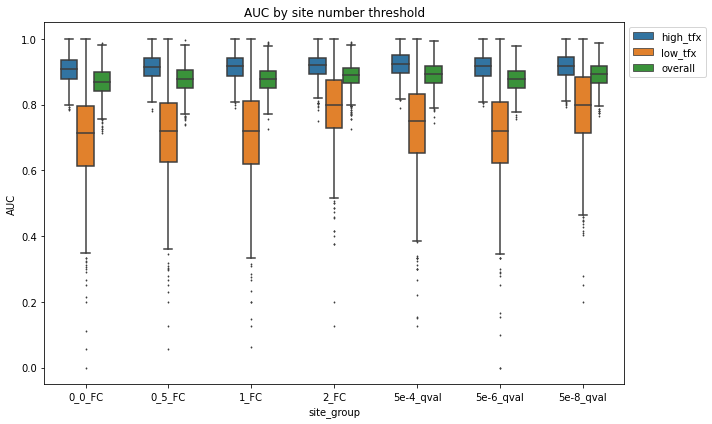

In [4]:
site_groups = ['0_0_FC','0_5_FC','1_FC','2_FC','5e-4_qval','5e-6_qval','5e-8_qval']
metric = 'AUC'

boxplot_data = pd.DataFrame()
for site_group in site_groups:
    current = pd.read_csv(in_dir+site_group+'_logreg_results/'+site_group+'.'+metric+'.txt', sep='\t')
    current = current[['high_tfx','low_tfx','overall']]
    current['site_group'] = site_group
    current = current.set_index('site_group').stack().reset_index()
    current = current.rename(columns = {'level_1':'group',0:metric})
    boxplot_data = boxplot_data.append(current)

fig,ax = plt.subplots(figsize = (10,6))
sns.boxplot(x = boxplot_data['site_group'],
            y = boxplot_data[metric],
            hue = boxplot_data['group'],
           width = 0.6,
           order = site_groups,
           ax = ax, fliersize = 1)

plt.legend(bbox_to_anchor = [1,1], loc = 'upper left');
plt.ylim(-0.05,1.05)
plt.tight_layout()
plt.title(metric+' by site number threshold')
fig.tight_layout()
plt.savefig('plots/'+metric+'_threshold_plot.pdf')

metrics_df = pd.DataFrame(index = boxplot_data['group'].unique())
for site_group in site_groups:
    df = boxplot_data[boxplot_data['site_group']==site_group]
    metrics_df[site_group] = df.groupby('group')[metric].median().copy()

print(metric)
np.round(metrics_df,2)



In [6]:
metrics_df = pd.DataFrame(index = boxplot_data['group'].unique())
for site_group in site_groups:
    df = boxplot_data[boxplot_data['site_group']==site_group]
    metrics_df[site_group] = np.round(df.groupby('group')[metric].median(),3).astype(str) + ' ('+ \
        np.round(df.groupby('group')[metric].quantile(0.025),3).astype(str) + '-' + \
        np.round(df.groupby('group')[metric].quantile(0.975),3).astype(str) + ')'
#format for table
# metrics_df = np.round(metrics_df,3)

print(metric)
metrics_df.loc[['low_tfx','high_tfx','overall']]

AUC


,0_0_FC,0_5_FC,1_FC,2_FC,5e-4_qval,5e-6_qval,5e-8_qval
low_tfx,0.714 (0.381-0.958),0.72 (0.416-0.97),0.718 (0.383-0.961),0.8 (0.571-1.0),0.75 (0.417-1.0),0.719 (0.425-1.0),0.8 (0.5-1.0)
high_tfx,0.909 (0.824-0.983),0.915 (0.836-0.987),0.917 (0.831-0.985),0.919 (0.833-0.98),0.924 (0.842-0.99),0.917 (0.836-0.983),0.918 (0.838-0.985)
overall,0.869 (0.777-0.946),0.879 (0.794-0.952),0.879 (0.796-0.947),0.891 (0.803-0.955),0.892 (0.811-0.956),0.878 (0.802-0.944),0.892 (0.815-0.957)


accuracy


,0_0_FC,0_5_FC,1_FC,2_FC,5e-4_qval,5e-6_qval,5e-8_qval
high_tfx,0.857,0.861,0.852,0.842,0.865,0.854,0.842
low_tfx,0.667,0.667,0.667,0.692,0.688,0.643,0.714
overall,0.804,0.804,0.800,0.800,0.811,0.796,0.804


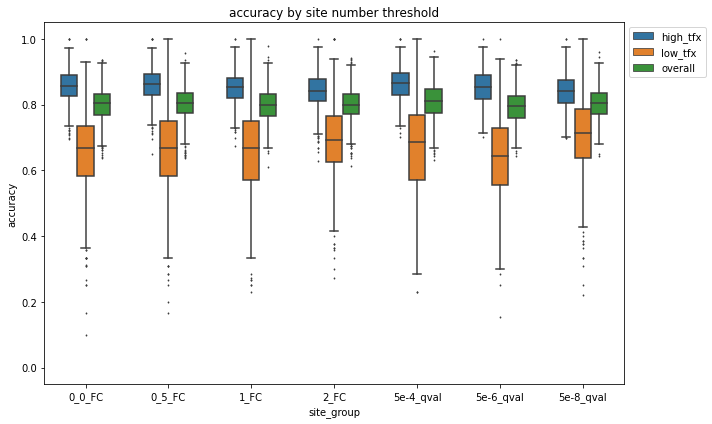

In [4]:
site_groups = ['0_0_FC','0_5_FC','1_FC','2_FC','5e-4_qval','5e-6_qval','5e-8_qval']
metric = 'accuracy'

boxplot_data = pd.DataFrame()
for site_group in site_groups:
    current = pd.read_csv(in_dir+site_group+'_logreg_results/'+site_group+'.'+metric+'.txt', sep='\t')
    current = current[['high_tfx','low_tfx','overall']]
    current['site_group'] = site_group
    current = current.set_index('site_group').stack().reset_index()
    current = current.rename(columns = {'level_1':'group',0:metric})
    boxplot_data = boxplot_data.append(current)

fig,ax = plt.subplots(figsize = (10,6))
sns.boxplot(x = boxplot_data['site_group'],
            y = boxplot_data[metric],
            hue = boxplot_data['group'],
           width = 0.6,
           order = site_groups,
           ax = ax,
           fliersize = 1)

plt.legend(bbox_to_anchor = [1,1], loc = 'upper left');
plt.ylim(-0.05,1.05)
plt.tight_layout()
plt.title(metric+' by site number threshold')
fig.tight_layout()
plt.savefig('plots/'+metric+'_threshold_plot.pdf')

metrics_df = pd.DataFrame(index = boxplot_data['group'].unique())
for site_group in site_groups:
    df = boxplot_data[boxplot_data['site_group']==site_group]
    metrics_df[site_group] = df.groupby('group')[metric].median().copy()

print(metric)
np.round(metrics_df,3)

In [5]:
import os
os.getcwd()

'/fh/fast/ha_g/user/adoebley/projects/griffin_revisions_1/figures/MBC_supplement'